# The sky in a notebook: the `ipyaladin` widget

<u>Matthieu Baumann</u>¹, Thomas Boch¹, Tom Czekaj & <u>Manon Marchand</u>¹

1. Strasbourg Astronomical Data Centre (CDS)

***

<img align="center" src="assets/CDS-logo.png" width="40%"/>

## The Aladin project

<img src="assets/qr-code/aladin.svg"
style="width: 20%; position:absolute; right:10px; top:0"></img>

* Started at the beginning of the 90s
* Development of a complete desktop java version since then

<img src="assets/first-paper.png" style="
      display: block;
      margin-left: auto;
      margin-right: auto;
        width:60%;
"></img>

### Desktop JAVA version

<img src="assets/aladin-desktop.png" style="
      display: block;
      margin-left: auto;
      margin-right: auto;
"></img>
<ul>
    <li>Data discovery tree (sky images and tabular data)</li>
    <li>Keywords filter (name of telescope, magnitude range, ...)</li>
    <li>Main view</li>
    <li>Survey and overlays stack (catalogs, footprints, images)</li>
</ul>

## Aladin Lite: a web client to embed in your web projects

* Project started in 2013
* Developed in Rust:
    * Access access to the GPU with WebGL2
    * Compiled to WebAssembly and wrapped around a JS API.
* Open source development: source code, API documentation and releases available on GitHub.

<img src="assets/qr-code/aladin-lite.svg" style="
      display: block;
      margin-left: auto;
      margin-right: auto;
    width:20%;
"></img>

* It is lightweight: < 1MB

### How does this work ?

Rendering of squared tile images - The more you zoom the more you see

In [ ]:
import IPython
IPython.display.IFrame("./al-adass2022.html", 1500, 600)

This is possible thanks to the HEALPix tesselation of the sky.

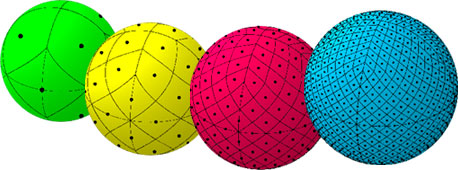:

- Equal area cells for a specific order
- 12 base cells at depth 0
- Each cell is subdivided into 4 at order+1

We produced at CDS more than 1200 image HEALPix surveys, 750 TB of HEALPix tile images from missions covering the whole observational spectrum

<figure>
<img src="assets/m101-through-full-spectrum.png" style="
      display: block;
      margin-left: auto;
      margin-right: auto;
    width:100%
"></img>
<figcaption>Galaxy M101 seen by different astronomical missions</figcaption>
</figure>

## Usage of Aladin Lite

* Rendering engine behind science portals:
<table>
    <tr>
        <th>ESASky</th>
        <th>ESO Science archive</th>
    </tr>
    <tr>
        <td><img src="assets/esasky.jpg" style="
      display: block;
      margin-left: auto;
      margin-right: auto;
    width:350px;
"></img></td>
        <td><img src="assets/eso-science-portal.jpeg" style="
      display: block;
      margin-left: auto;
      margin-right: auto;
    width:350px;
"></img></td>
    </tr>
</table>


* Between 30000 and 40000 startups a day.
<img src="assets/aladin lite startups.png" style="
      display: block;
      margin-left: auto;
      margin-right: auto;
    width:45%;
"></img>

* Aladin lite is published as a universal common js module as well as a ES module through NPM.

## ``ipyaladin``: a Python jupyter widget around Aladin Lite

<img src="assets/qr-code/ipyaladin.svg"
style="width: 20%; position:absolute; right:10px; bottom:0"></img>


<img src="assets/ipyaladin-screencast.gif" style="
          display: block;
      margin-left: auto;
      margin-right: auto;
    width:80%;
"></img>


## `ipyaladin` in action: exploration of the Perseus's Cluster of galaxies

<img src="assets/formula.png" width="100%"> 

In [ ]:
from ipyaladin import Aladin

In [ ]:
aladin = Aladin()
aladin

change target from Python

In [ ]:
aladin.target = "Perseus Cluster"

and save it in a variable

In [ ]:
target = aladin.target
target

Read the relevant field of view

In [ ]:
field_of_view = aladin.fov
field_of_view

 ## Identify the galaxies in one click

<img src="assets/target.png" width="10%" align="center center">


The information comes from the SIMBAD bibliographic database

In [ ]:
from astroquery.simbad import Simbad

In [ ]:
known_galaxies = Simbad.query_region(
    target,
    radius=field_of_view,
    criteria="otype = 'G..'"
)
print(f"Found {len(known_galaxies)} galaxies in {field_of_view.deg}° around this point.")

In [ ]:
aladin.add_table(known_galaxies, color="lightgreen", name="known_galaxies")

Some of them are missing. Let's see what we can learn from other sources

## Multi-wavelength characterization

The physical information lies in different parts of the electromagnetic spectrum, that are explored by different telescopes.

 <img src="assets/spectrum.png" width="100%"> 

 Let's explore `ipyaladin`'s features along this spectrum. 

<img src="assets/askap_euclid.png" width="80%">

### ASKAP Mid Survey + Euclid Early Release: layering data sources

Let's have a look at Euclid's early release data



In [ ]:
aladin.survey = "CDS/P/Euclid/ERO/FirstImages"

This is 6 GB of pixels only in this field of view. Hard to work with this in RAM.

In [ ]:
euclid_cutout = aladin.get_view_as_fits()[0]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
plt.imshow(np.flipud(np.moveaxis(euclid_cutout.data, 0, -1)))

or find the ASKAP survey via the GUI interface

<img src="assets/browse_hips.png" width="20%">

the pixels on screen can be saved as png images

In [ ]:
aladin.save_view_as_image("euclid.png")

In [ ]:
plt.imshow(plt.imread("euclid.png"))

 <img src="assets/gaia.png" width="80%"> 

### Catalog data from Gaia

In [ ]:
from astroquery.vizier import Vizier

In [ ]:
extra_galactic = Vizier(catalog="I/356/galcand", row_limit=-1).query_region(
    target,
    radius=field_of_view
)[0]
extra_galactic

In [ ]:
aladin.add_table(extra_galactic[extra_galactic["Class"] == "GALAXY"], 
                 shape="circle", source_size=15, color="lightblue",
                 name="galaxies")
aladin.add_table(extra_galactic[extra_galactic["Class"] != "GALAXY"], 
                 shape="circle", source_size=15, color="pink",
                 name="candidates")

We can retrieve a sub-selection of these tables

In [ ]:
aladin.selected_objects[1]

In [ ]:
candidates_close_to_center = aladin.selected_objects[2]
candidates_close_to_center

<img src="assets/chandra.png" width="80%">

### Drawing shapes on the Chandra Survey

In [ ]:
aladin.survey = "cxc.harvard.edu/P/cda/hips/allsky/rgb"

These are shockwaves. We can draw their shapes with the polygon MOC drawing tool (MOCs are ensemble of pixels on the sky)

And this information can then be exploited on the python side

In [ ]:
from mocpy import MOC
import json
from astropy.coordinates import Angle

In [ ]:
with open("poly.json", "r") as f:
    moc = MOC.from_json(json.loads(f.read()))

In [ ]:
mask = moc.contains_lonlat(
    Angle(known_galaxies["RA_ICRS"], unit="deg"),
    Angle(known_galaxies["DE_ICRS"], unit="deg") 
)

In [ ]:
aladin.add_table(known_galaxies[mask], color="white", name="possible_influcence")

End of demonstration :)

## How can you make your own widget?

- ECMAScript module
- Easy port in different notebooks platforms with anywidget
- conversion of simple data types between JS and python (floats, strings, objects)
- need an IO in both languages for more complex data types (tables/MOCs)

## Conclusion

<img src="assets/qr-code/qr_ipyaladin.png" align="right" width="30%">

- interactive exploratory analysis
- image/dataset segmentation
- exchange of data between javascript and python
- way more features on our repo the QR code will be your guide)
- come and chat (widgets, astrophysics, ...?)

Thanks for listening, all questions welcome